<a href="https://colab.research.google.com/github/sliv66/LA2050-River/blob/Data-Prep-Orgs/Data_Inspection_Organizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



filename = os.path.join(os.getcwd(), "organizations-new.json")

df = pd.read_json(filename)

df.columns

Index(['slug', 'type', 'website', 'instagram', 'twitter', 'facebook',
       'newsletterLink', 'title', 'ein', 'zipcode', 'volunteerLink', 'summary',
       'category'],
      dtype='object')

In [7]:
df.shape

(2634, 13)

In [9]:
df.head()

,slug,type,website,instagram,twitter,facebook,newsletterLink,title,ein,zipcode,volunteerLink,summary,category
0,lact-los-angeles-community-theatre,Nonprofit,https://www.losangelescommunitytheatre.org,,LACT2050,Paul3930?fref=ts,None,LACT - Los Angeles Community Theatre,,90031,None,We build community through theatre.,Arts & cultural vitality
1,dharma-health-institute,For profit business,https://www.dharmahealthinstitute.com,dharmahealthinstitute,DharmaHealthLA,dharmahealthinstitute,None,Dharma Health Institute,954116679,90036,None,DIY Girls’ mission is to increase girls’ inter...,Health
2,the-story-project,Nonprofit,https://www.storyproject.org,,storyprojectLA,The-Story-Project-116216105118265timeline/,None,The Story Project,954684376,90036,None,The Story Project encourages at-risk youth in ...,Education & youth
3,first-place-for-youth,Nonprofit,https://firstplaceforyouth.org,FirstPlaceforYouth,FPFY,firstplaceforyouth,https://firstplaceforyouth.org,First Place for Youth,,,None,First Place provides foster youth with intensi...,Education & youth
4,pvjobs,Non-profit organization with independent 501(c...,https://www.pvjobs.org,PVJOBSLA,pvjobsla,PVJOBS,None,PVJOBS,954706948,None,None,PVJOBS is a nonprofit 501©3 public benefit cor...,


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('slug').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('website').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('instagram').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_4.groupby('slug')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('slug')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['website'].value_counts()
    for x_label, grp in _df_5.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('website')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['instagram'].value_counts()
    for x_label, grp in _df_6.groupby('website')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('website')
_ = plt.ylabel('instagram')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['twitter'].value_counts()
    for x_label, grp in _df_7.groupby('instagram')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('instagram')
_ = plt.ylabel('twitter')

In [13]:
df.columns

Index(['slug', 'type', 'website', 'instagram', 'twitter', 'facebook',
       'newsletterLink', 'title', 'ein', 'zipcode', 'volunteerLink', 'summary',
       'category'],
      dtype='object')

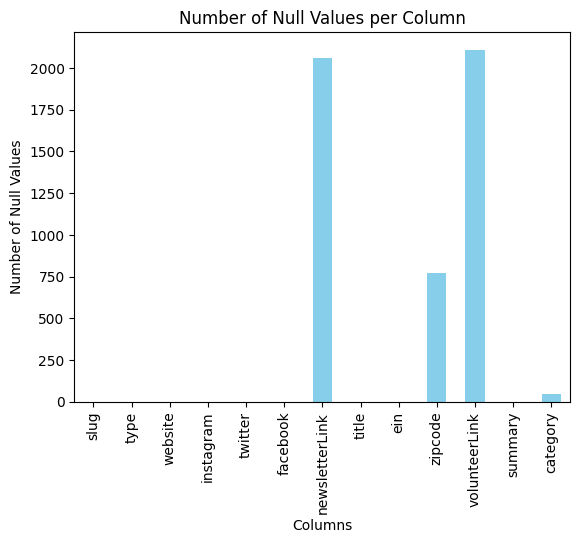

In [61]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

# Create the bar graph
nan_count.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')

# Show plot
plt.show()


In [37]:
df['type'].unique()

array(['Nonprofit', 'For profit business',
       'Non-profit organization with independent 501(c)(3) status',
       'Social enterprise or B-corps', 'For-profit organization', 'Other',
       'Individual', 'Government', 'A fiscally sponsored group',
       'Social enterprise or Bcorps', 'Government entity',
       'Fiscally-sponsored organization with sponsored 501(c)(3) status',
       'For-profit organization ', 'Social enterprise or B-corps ',
       'Government entity '], dtype=object)

In [60]:
# Step 1: Convert the 'zipcodes' column to integers
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce').astype('Int64')

# Step 2: Group organizations by 'zipcodes' and count them
# Assuming the organization names are in the 'slug' column
organizations_by_zipcode = df.groupby('zipcode')['title'].agg(org_list=list, org_count='size').reset_index()

# Step 3: View the DataFrame with the list of organizations and the number of organizations per zip code
print(organizations_by_zipcode)

# Step 4: Sort by the most common zip codes (based on the number of organizations)
most_common_zipcodes = organizations_by_zipcode.sort_values(by='org_count', ascending=False)

# Step 5: View the top 10 most common zip codes
print(most_common_zipcodes.head(25))

     zipcode                                           org_list  org_count
0       2108                            [Citizen Schools, Inc.]          1
1       2109                                    [Year Up, Inc.]          1
2       2135  [The GroundTruth Project, home of Report for A...          1
3       2461                              [Project Giving Kids]          1
4       8824                [Angel AHMA LLC, Mindful Sense LLC]          2
..       ...                                                ...        ...
410    96161                   [Womxn Of Wealth Foundation Inc]          1
411    97211                                  [Income Movement]          1
412    98115                             [Maxwell Vehicles LLC]          1
413    98370                                   [Two Bit Circus]          1
414    99203            [The Alliance for Media Arts + Culture]          1

[415 rows x 3 columns]
     zipcode                                           org_list  org_count
6